In [1]:
#importings

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

# Questions

- Profit = cash - taxes (0.14)
- Analyize all sales profit
- What is the profit for each weekday
- What is the profit from each city

In [73]:
#read the Sales.csv dataset 
df = pd.read_csv('Sales.csv')

In [74]:
df.isna().sum()

Order ID            80
Product             80
Quantity Ordered    80
Price Each           0
Order Date          80
Purchase Address    80
dtype: int64

## 1. Distniguesh features

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          25037 non-null  object
 1   Product           25037 non-null  object
 2   Quantity Ordered  25037 non-null  object
 3   Price Each        25117 non-null  object
 4   Order Date        25037 non-null  object
 5   Purchase Address  25037 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [76]:
df.duplicated().sum()

166

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.reset_index(drop = True,inplace=True)

In [79]:
df['Quantity Ordered'].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', nan, '7', '5', '6'],
      dtype=object)

In [80]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors='coerce')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          24950 non-null  object 
 1   Product           24950 non-null  object 
 2   Quantity Ordered  24949 non-null  float64
 3   Price Each        24951 non-null  object 
 4   Order Date        24950 non-null  object 
 5   Purchase Address  24950 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [82]:
df['Price Each'].unique()

array(['1700$', '600.0$', '11.95$', '149.99$', '3.84$', '99.99$', '2.99$',
       '999.99$', '14.95$', '600$', '11.99$', '150$', '400$', '700$',
       '109.99$', '379.99$', '300$', '389.99$', 'Price Each$', 'nan$'],
      dtype=object)

In [83]:
def price_each(row):
    try:
        return float(row[:-1])
    except:
        return np.nan
df['Price Each'] =df['Price Each'].apply(price_each)
    

In [84]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
24946,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
24947,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
24948,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
24949,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [85]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')

In [86]:
def get_city(address):
    try:
        return address.split(',')[1].strip()
    except:
        return np.nan
df['Purchase Address'] =df['Purchase Address'].apply(get_city)

In [87]:
df.drop(254,inplace=True)

In [88]:
df.reset_index(drop=True,inplace = True)

In [89]:
df[df['Product'] == 'Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24950 entries, 0 to 24949
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          24949 non-null  object        
 1   Product           24949 non-null  object        
 2   Quantity Ordered  24949 non-null  float64       
 3   Price Each        24949 non-null  float64       
 4   Order Date        24949 non-null  datetime64[ns]
 5   Purchase Address  24949 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.1+ MB


In [91]:
df['Quantity Ordered'].isna().sum()

1

In [92]:
df.describe(include='all')

C:\Users\Ahmed_Moataz\AppData\Local\Temp\ipykernel_3272\2884002236.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,24949,24949,24949.000000,24949.000000,24949,24949
unique,24006,19,NaN,NaN,17305,9
top,296353,USB-C Charging Cable,NaN,NaN,2019-12-15 20:16:00,San Francisco
freq,4,2980,NaN,NaN,8,6006
first,NaN,NaN,NaN,NaN,2019-12-01 02:50:00,NaN
last,NaN,NaN,NaN,NaN,2020-01-01 05:13:00,NaN
mean,NaN,NaN,1.125536,183.934078,NaN,NaN
std,NaN,NaN,0.445742,333.209044,NaN,NaN
min,NaN,NaN,1.000000,2.990000,NaN,NaN
25%,NaN,NaN,1.000000,11.950000,NaN,NaN


In [93]:
df['Order Date'].dt.year.unique()

array([2019.,   nan, 2020.])

In [94]:
df['day'] = df['Order Date'].dt.day_name()

In [95]:
df.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
day                 1
dtype: int64

In [96]:
df.dropna(inplace = True)

In [97]:
df.describe()

,Quantity Ordered,Price Each
count,24949.000000,24949.000000
mean,1.125536,183.934078
std,0.445742,333.209044
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,7.000000,1700.000000


C:\Users\Ahmed_Moataz\AppData\Local\Temp\ipykernel_3272\3537153654.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot:xlabel='Quantity Ordered', ylabel='Density'>

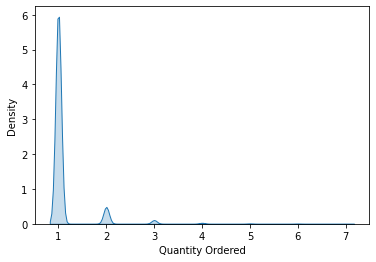

In [98]:
sns.kdeplot(data=df,x = 'Quantity Ordered', shade = True)

In [99]:
import plotly.figure_factory as ff

In [100]:
his_data = df

In [101]:
ff.create_distplot([df['Quantity Ordered'].to_list()],group_labels=['asa'])

## 2. Data cleaning

**Problems**

- Numerical
    - Quantity Ordered is not numerical
    - Price Each not numerical
- Categorical
    - Product columns has 'Product' value 

In [102]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
day                 0
dtype: int64

In [103]:
df.describe()

,Quantity Ordered,Price Each
count,24949.000000,24949.000000
mean,1.125536,183.934078
std,0.445742,333.209044
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,7.000000,1700.000000


In [104]:
#find unique values in quantity
df[df['Quantity Ordered'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day


In [105]:
#write a function to fix the quantity and apply it on the quantity column

In [106]:
#check the dataframe again

In [107]:
#check unqiues values in Price

In [108]:
#write a function to fix the price and apply it to the Price column

In [109]:
#check now the data types

In [110]:
#find unique values in Product

In [111]:
#fix them, if you think there's something that doesn't make sense

# Handle Duplicated values

In [112]:
#check if there are duplicates in the dataset


In [113]:
#drop duplicates

In [114]:
#DO NOT FORGET TO RESET THE INDEX

# Missing Values

In [115]:
#check missing values

In [116]:
#check percentage of missing values

In [117]:
#deal with them in a suitable way ( drop/ replace )

In [118]:
#recheck them again

# Handle Outliers

In [120]:
from datasist.structdata import detect_outliers

In [122]:
num_cols = df.columns[df.dtypes!='object']
num_cols

Index(['Quantity Ordered', 'Price Each', 'Order Date'], dtype='object')

In [124]:
#predict outliers in the data and deal with them in a suitable way
# outliers = detect_outliers(df, n = 0,features=num_cols)

In [125]:
for col in num_cols:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median

# Feature Engineering

### Calculate the *Profit*
Rule: Profit = cash - taxes (0.14)

In [127]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day
0,295665,Macbook Pro Laptop,1.0,14.95,2019-12-30 00:01:00,New York City,Monday
1,295666,LG Washing Machine,1.0,14.95,2019-12-29 07:03:00,New York City,Sunday
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,New York City,Thursday
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,San Francisco,Sunday
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,Atlanta,Wednesday


In [128]:
#write a function to calculate the profit  according to the above rule
def cal_profit(row):
    return (row['Quantity Ordered']*row['Price Each'])-(row['Quantity Ordered']*row['Price Each']*0.14)
# profit = 

In [129]:
#create a new column in the dataframe by applying the function to it
df['profit'] = df.apply(cal_profit,axis=1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,profit
0,295665,Macbook Pro Laptop,1.0,14.95,2019-12-30 00:01:00,New York City,Monday,12.8570
1,295666,LG Washing Machine,1.0,14.95,2019-12-29 07:03:00,New York City,Sunday,12.8570
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,New York City,Thursday,10.2770
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,San Francisco,Sunday,128.9914
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,Atlanta,Wednesday,10.2770
...,...,...,...,...,...,...,...,...
24945,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,San Francisco,Wednesday,12.8570
24946,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,Los Angeles,Sunday,6.6048
24947,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,Seattle,Monday,344.0000
24948,319669,Wired Headphones,1.0,14.95,2019-12-03 10:39:00,Dallas,Tuesday,12.8570


In [130]:
#write a function to extract the city from the address 
df['Purchase Address'].unique()

array(['New York City', 'San Francisco', 'Atlanta', 'Portland', 'Dallas',
       'Los Angeles', 'Boston', 'Austin', 'Seattle'], dtype=object)

In [133]:
#visualize the distribution of the created profit column
px.histogram(df['profit'])

In [135]:
#change the order Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24949 entries, 0 to 24949
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          24949 non-null  object        
 1   Product           24949 non-null  object        
 2   Quantity Ordered  24949 non-null  float64       
 3   Price Each        24949 non-null  float64       
 4   Order Date        24949 non-null  datetime64[ns]
 5   Purchase Address  24949 non-null  object        
 6   day               24949 non-null  object        
 7   profit            24949 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.7+ MB


In [139]:
#extract the day name from the order Date column
df['day_name']= df['Order Date'].dt.day_name()

In [140]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day,profit,day_name
0,295665,Macbook Pro Laptop,1.0,14.95,2019-12-30 00:01:00,New York City,Monday,12.8570,Monday
1,295666,LG Washing Machine,1.0,14.95,2019-12-29 07:03:00,New York City,Sunday,12.8570,Sunday
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,New York City,Thursday,10.2770,Thursday
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,San Francisco,Sunday,128.9914,Sunday
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,Atlanta,Wednesday,10.2770,Wednesday
...,...,...,...,...,...,...,...,...,...
24945,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,San Francisco,Wednesday,12.8570,Wednesday
24946,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,Los Angeles,Sunday,6.6048,Sunday
24947,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,Seattle,Monday,344.0000,Monday
24948,319669,Wired Headphones,1.0,14.95,2019-12-03 10:39:00,Dallas,Tuesday,12.8570,Tuesday


In [ ]:
#explore the profit for each country
#i.e. group by city and return the profit of each city

In [145]:
cities = df.groupby(by = 'Purchase Address')['profit'].sum().sort_values(ascending = False)

In [148]:
#draw boxplot of each city with respect to the profit
cities

Purchase Address
San Francisco    797863.7960
Los Angeles      476300.0866
New York City    459306.9854
Boston           357936.2484
Dallas           267705.8654
Seattle          267601.6764
Atlanta          249307.2662
Portland         209251.3558
Austin           172192.2702
Name: profit, dtype: float64

In [24]:
#find the first 6 cities with highest profit

In [27]:
#draw boxplot of each weekday with respect to the profit

In [ ]:
#sort the weekday with respect to the profit


In [ ]:
#visualize sort the weekday with respect to the profit
